In [1]:
# imports

from self_reflection_helper import *
from self_prediction import *
from cot import Collection

"""Imports"""
from langchain.chat_models import ChatOpenAI
from langchain.prompts.chat import (
    ChatPromptTemplate,
    SystemMessagePromptTemplate,
    AIMessagePromptTemplate,
    HumanMessagePromptTemplate,
)
from langchain.schema import (
    AIMessage,
    HumanMessage,
    SystemMessage
)


import yaml

## Run CoT




In [8]:
data = Collection(["med_qa"], verbose=False)
data = data.select(split="test", number_samples=1, random_samples=True, seed=0)

Loading med_qa...


In [10]:
data

| Name   | Train   | Valid   |   Test |
|--------|---------|---------|--------|
| med_qa | -       | -       |      1 |

Not loaded: ['aqua', 'asdiv', 'commonsense_qa', 'entailment_bank', 'gsm8k', 'mawps', 'med_qa_open', 'medmc_qa', '_init_', 'mmlu_clinical_knowledge', 'mmlu_college_biology', 'mmlu_college_medicine', 'mmlu_medical_genetics', 'mmlu_professional_medicine', '_init_', 'mmlu_anatomy', 'open_book_qa', 'pubmed_qa', 'qed', 'strategy_qa', 'svamp', 'worldtree']

In [12]:
config={
    "instruction_keys": None,
    "cot_trigger_keys": ["zhou-01"],
    "answer_extraction_keys": 'auto-kojima', 
    "author" : "thoughtsource",
    "api_service": "openai_chat",
    "api_time_interval": 1,
    "engine": "gpt-3.5-turbo", 
    "temperature": 0,
    "max_tokens": 512,
    "verbose": False,
    "warn": False,
}
data.generate(config=config)
data.evaluate()
# med_qa.dump("med_qa")

Generating med_qa...


{'med_qa': {'test': {'accuracy': {'gpt-3.5-turbo': {'None_zhou-01_kojima-A-E': 1.0}}}}}

## Run reflection

In [16]:
# 3.5 on 3.5
model = 'gpt-3.5-turbo'
path = "./reflection_messages/final_system_messages/first_template.yaml"
system_evaluate(data,model,path)

dataset_name = "med_qa_one_sample"
template = "first"
base_model = "gpt-3.5-turbo"
critique_model = "gpt-3.5-turbo"

dump_path = f"{dataset_name}_{template}_{base_model}_{critique_model}"
data.dump(dump_path+".json")

Generating med_qa...


## Run Statistics on Reflection



Average over objectives for all items
        Average
obj_1     100.0
obj_2     100.0
obj_3     100.0
obj_4     100.0
obj_5     100.0
obj_6     100.0
obj_7     100.0
obj_8     100.0
obj_9     100.0
obj_10    100.0
obj_11    100.0




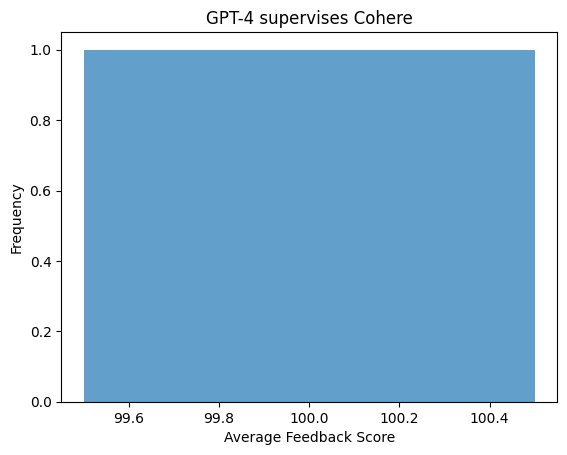

AssertionError: 

In [19]:
#Needs at least one correct and one false sample
data = Collection.from_json("med_qa_one_sample_first_gpt-3.5-turbo_gpt-3.5-turbo.json")
eval_reflection(data, idx_cot=1, dataset='med_qa', split='test', plot_title='GPT-4 supervises Cohere')
predictions(data, idx_cot=1, dataset='med_qa', split='test', plot_title='GPT-4 supervises Cohere')